In [1]:
#import necessary pkgs
import cv2
import numpy as np
import torch
from ipynb.fs.full.cnn import Net
import matplotlib.pyplot as plt

In [2]:
def apply_model(path):
    
    #standardize image size (dimensions) : make them 50x50 pixels
    img_size = 50
    
    plt.imshow(cv2.imread(path))
    plt.show()
    
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)    #grayscale all the img; case-to-case basis depending on the research problem
        
    img = cv2.resize(img, (img_size, img_size))     #resize image
        
    img_array = np.array(img)       #convert image into pixel array; since grayscaled we have 1 value per pixel, if colored (r,g,b) values per pixel
    
    img_array = img_array/255
    
    img_array = torch.Tensor(img_array)
    
    net = Net()
    
    net.load_state_dict(torch.load("saved_model.pth"))
    net.eval()
    
    net_out = net(img_array.view(-1, 1, img_size, img_size))[0]
    
    if net_out[0] > net_out[1]:
        print()
        print()
        print("Prediction: BENIGN")
        print(f"Confidence: {round(float(net_out[0]), 3)}")
        print()
        print()
    else:
        print()
        print()
        print("Prediction: MALIGNANT")
        print(f"Confidence: {round(float(net_out[1]), 3)}")
        print()
        print()
        

In [3]:
# img_test = cv2.imread("demo_pics/pic2.jpg")
# plt.imshow(img_test)
# plt.show()

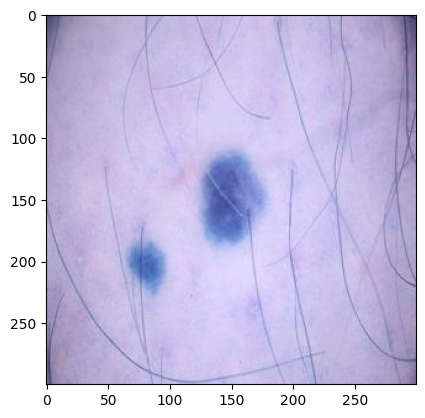



Prediction: BENIGN
Confidence: 1.0




/var/folders/fq/09kvyhs13yv_g91hj_p6y7m00000gn/T/ipykernel_76208/621699262.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load("saved_model.p

In [4]:
apply_model("demo_pics/pic1.jpg")